<a href="https://colab.research.google.com/github/alexiej/laboratory/blob/master/1_11_Machine_Learning_Learning_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline 

# 1.0 model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# sample dataset
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# 1.1 Learning curve - How the model learn

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve

* cv: cross validation
* train_siizez - example of trarin sizes
* shuffle=True - random examples

```
learning_curve(
        model, X, y, 
        cv=None, n_jobs=1,
        train_sizes=np.linspace(.1, 1.0, 5),
        shuffle=True
        // array([0.1  , 0.325, 0.55 , 0.775, 1.   ]) 
```


In [19]:
np.linspace(.1, 1.0, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(model, title, X, y, 
                        ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
       
        shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

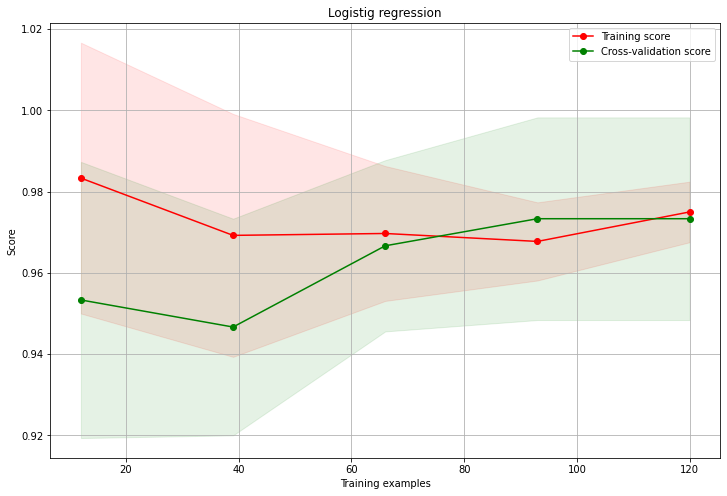

In [16]:
plot_learning_curve(
    LogisticRegression(random_state=123, max_iter=1000),
    'Logistig regression', X,y
)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

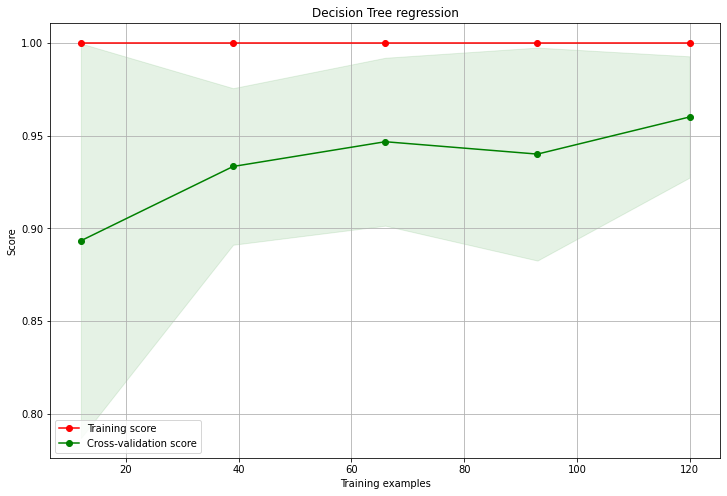

In [18]:
plot_learning_curve(
    DecisionTreeClassifier(random_state=123),
    'Decision Tree regression', X,y
)